#Milestone 2
Theo Jonathan

FTDS Batch 020

##Objective
Mampu memahami konsep Machine Learning secara keseluruhan.

Mampu mempersiapkan data untuk digunakan dalam model Supervised Learning atau Unsupervised Learning.

Mampu mengimplementasikan Supervised Learning atau Unsupervised Learning dengan data yang dipilih.

Mampu melakukan Hyperparameter Tuning dan Model Improvement.

Mampu melakukan Model Deployment.

##Problem Statement
Red wine merupakan salah satu minuman beralkohol paling laris di dunia. Biasa dikonsumsi saat fine dining atau saat melakukan perayaan yang penting, red wine menjadi suatu kebutuhan bagi peminatnya yang merupakan restoran-restoran mahal dan bahkan seorang wine connoisseur. Dengan proses pembuatan yang rumit dan sangat diperhatikan, sebotol red wine bisa memiliki harga dari yang masih terjangkau hingga harga yang bahkan tidak masuk akal.

Saya seorang data analyst yang diminta bantuannya untuk menentukan kualitas red wine berdasarkan data yang ada. Tingkat keasaman, kandungan gula, chloride, sulfur, level alkohol, hingga pH menjadi faktor-faktor yang menentukan kualitas sebotol red wine.


##Penjelasan Dataset
Dataset merupakan kumpulan data yang menentukan kualitas sebuah red wine. Mulai dari tingkat keasaman, kandungan gula, chloride, sulfur, hingga pH menjadi faktor-faktor yang menentukan kualitas sebotol red wine.

https://www.kaggle.com/datasets/maitree/wine-quality-selection?resource=download

##Import Libraries

In [429]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, mean_absolute_error, r2_score

import pickle

import warnings
warnings.filterwarnings("ignore")

import sklearn
sklearn.__version__

'1.2.2'

##Data Loading

In [430]:
#Loading dataset
df = pd.read_csv('/content/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [431]:
#Menampilkan 10 data pertama
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [432]:
#Menampilkan 10 data terakhir
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [433]:
#Melihat besar data
df.shape

(1599, 12)

Data terdiri dari 1599 baris dan 12 kolom.

In [434]:
#Melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Semua data bertipe numerical.

In [435]:
#Melihat isi data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [436]:
#Merubah nama kolom agar terlihat lebih baik
df1 = df.rename(
    columns={"fixed acidity": "Fixed_Acidity", "volatile acidity": "Volatile_Acidity","citric acid": "Citric_Acid","residual sugar":"Residual_Sugar", "chlorides":"Chlorides", "free sulfur dioxide":"Free_Sulfur_Dioxide","total sulfur dioxide": "Total_Sulfur_Dioxide","density":"Density","sulphates":"Sulphates","alcohol":"Alcohol","quality":"Quality"}
)
df = df1.copy()
df

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [437]:
#Menentukan apa saja tipe data yang termasuk Numerical
num_cols= df.columns[df.dtypes != 'object'].tolist()
num_cols

['Fixed_Acidity',
 'Volatile_Acidity',
 'Citric_Acid',
 'Residual_Sugar',
 'Chlorides',
 'Free_Sulfur_Dioxide',
 'Total_Sulfur_Dioxide',
 'Density',
 'pH',
 'Sulphates',
 'Alcohol',
 'Quality']

##Exploratory Data Analysis (EDA)

In [438]:
#Melihat apakah ada data duplikat
df.duplicated().sum()

240

In [439]:
#Melihat data duplikat
df[df.duplicated(keep=False)]

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


Ada kemungkinan tipe wine yang memiliki kualitas yang sama muncul saat pengambilan data sehingga terdapat beberapa data duplikat. Data duplikat dapat mempengaruhi performa model sehingga akan didrop.

In [440]:
#Mengatasi data duplikat
df.drop_duplicates(inplace=True)

In [441]:
#Memeriksa apakah masih ada data duplikat
df.duplicated().sum()

0

Sudah tidak ada data duplikat.

In [442]:
#Memeriksa missing values pada dataset
df.isnull().sum()

Fixed_Acidity           0
Volatile_Acidity        0
Citric_Acid             0
Residual_Sugar          0
Chlorides               0
Free_Sulfur_Dioxide     0
Total_Sulfur_Dioxide    0
Density                 0
pH                      0
Sulphates               0
Alcohol                 0
Quality                 0
dtype: int64

Tidak ada missing value pada data berarti semua data terinput dengan baik.

In [443]:
#Melihat distribusi data
df.skew()

Fixed_Acidity           0.941041
Volatile_Acidity        0.729279
Citric_Acid             0.312726
Residual_Sugar          4.548153
Chlorides               5.502487
Free_Sulfur_Dioxide     1.226579
Total_Sulfur_Dioxide    1.540368
Density                 0.044778
pH                      0.232032
Sulphates               2.406505
Alcohol                 0.859841
Quality                 0.192407
dtype: float64

array([[<Axes: title={'center': 'Fixed_Acidity'}>,
        <Axes: title={'center': 'Volatile_Acidity'}>,
        <Axes: title={'center': 'Citric_Acid'}>],
       [<Axes: title={'center': 'Residual_Sugar'}>,
        <Axes: title={'center': 'Chlorides'}>,
        <Axes: title={'center': 'Free_Sulfur_Dioxide'}>],
       [<Axes: title={'center': 'Total_Sulfur_Dioxide'}>,
        <Axes: title={'center': 'Density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'Sulphates'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Quality'}>]], dtype=object)

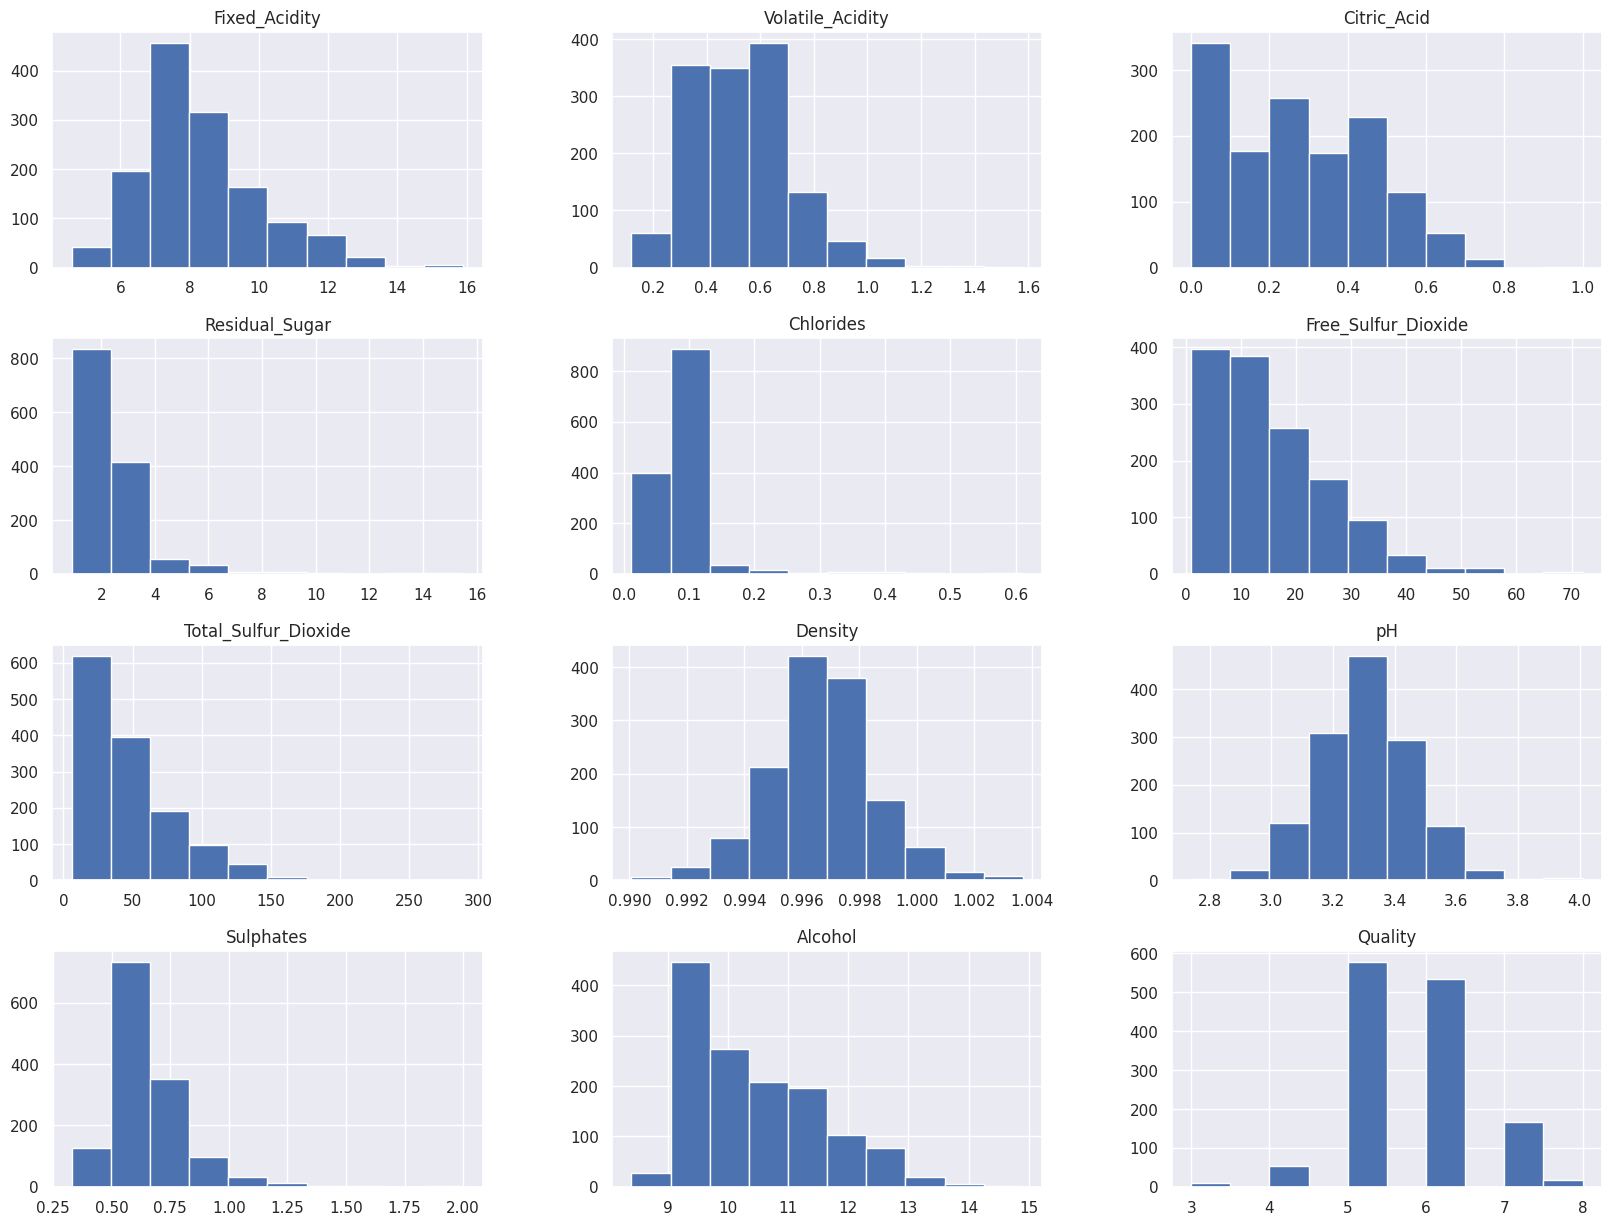

In [444]:
#Melihat visualisasi distribusi data
df.hist(figsize =(20,15))

Terlihat hampir semua data terdistribusi dengan normal kecuali Citric_Acid, Residual_Sugar, Chlorides, Total_Sulfur_Dioxide, Density, pH, Sulphates,dan Quality.

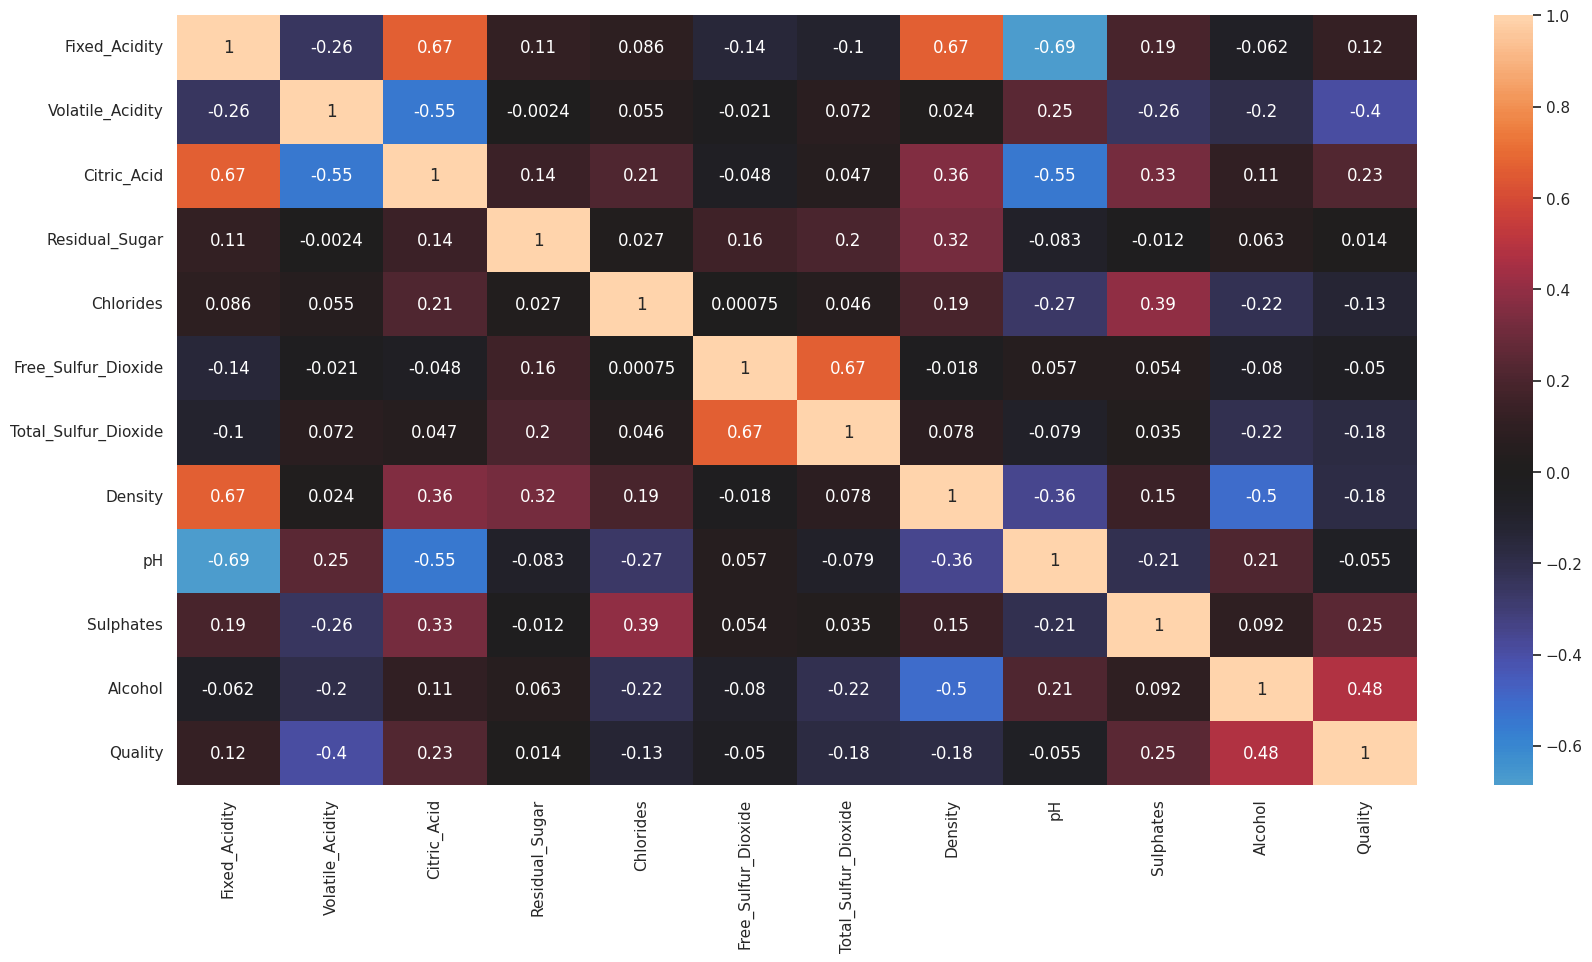

In [445]:
#Melihat heatmap korelasi data
df_corr= df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot= True, center=0)
plt.show()

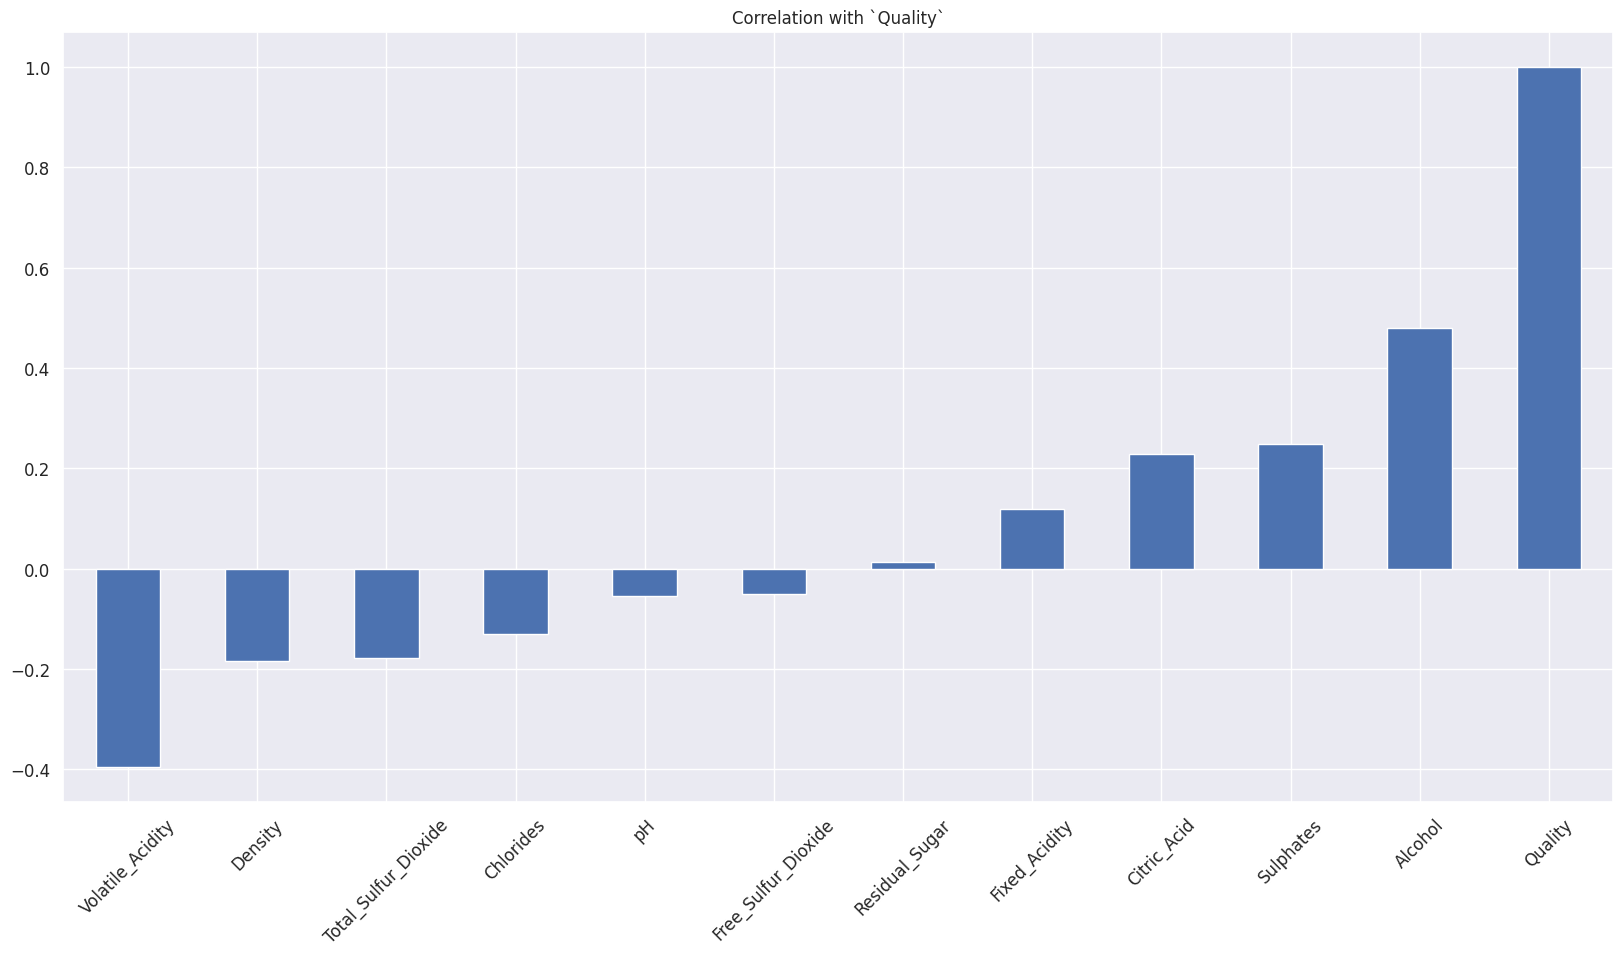

In [446]:
#Melihat plot korelasi data
df.corrwith(df['Quality']).sort_values().plot.bar(figsize=(20,10), title='Correlation with `Quality`', fontsize=12, rot=45, grid=True)
plt.show()

Hampir semua data tidak memiliki korelasi yang kuat satu dengan yang lain kecuali, Citric_Acid dengan Fixed_Acidity karena sama-sama menilai tingkat acidity, Fixed_Acidity dengan Density karena menilai massa keasaman pada wine, Free_Sulfur_Dioxide dengan Total_Sulfur_Dioxide karena sama-sama menilai tingkat oksidasi sulfur pada sebuah wine.

Dari plot diatas bisa dilihat bahwa semua data tidak memiliki korelasi yang kuat dengan data Quality, yang nantinya akan menjadi target pada pemodelan ini kecuali Alcohol.

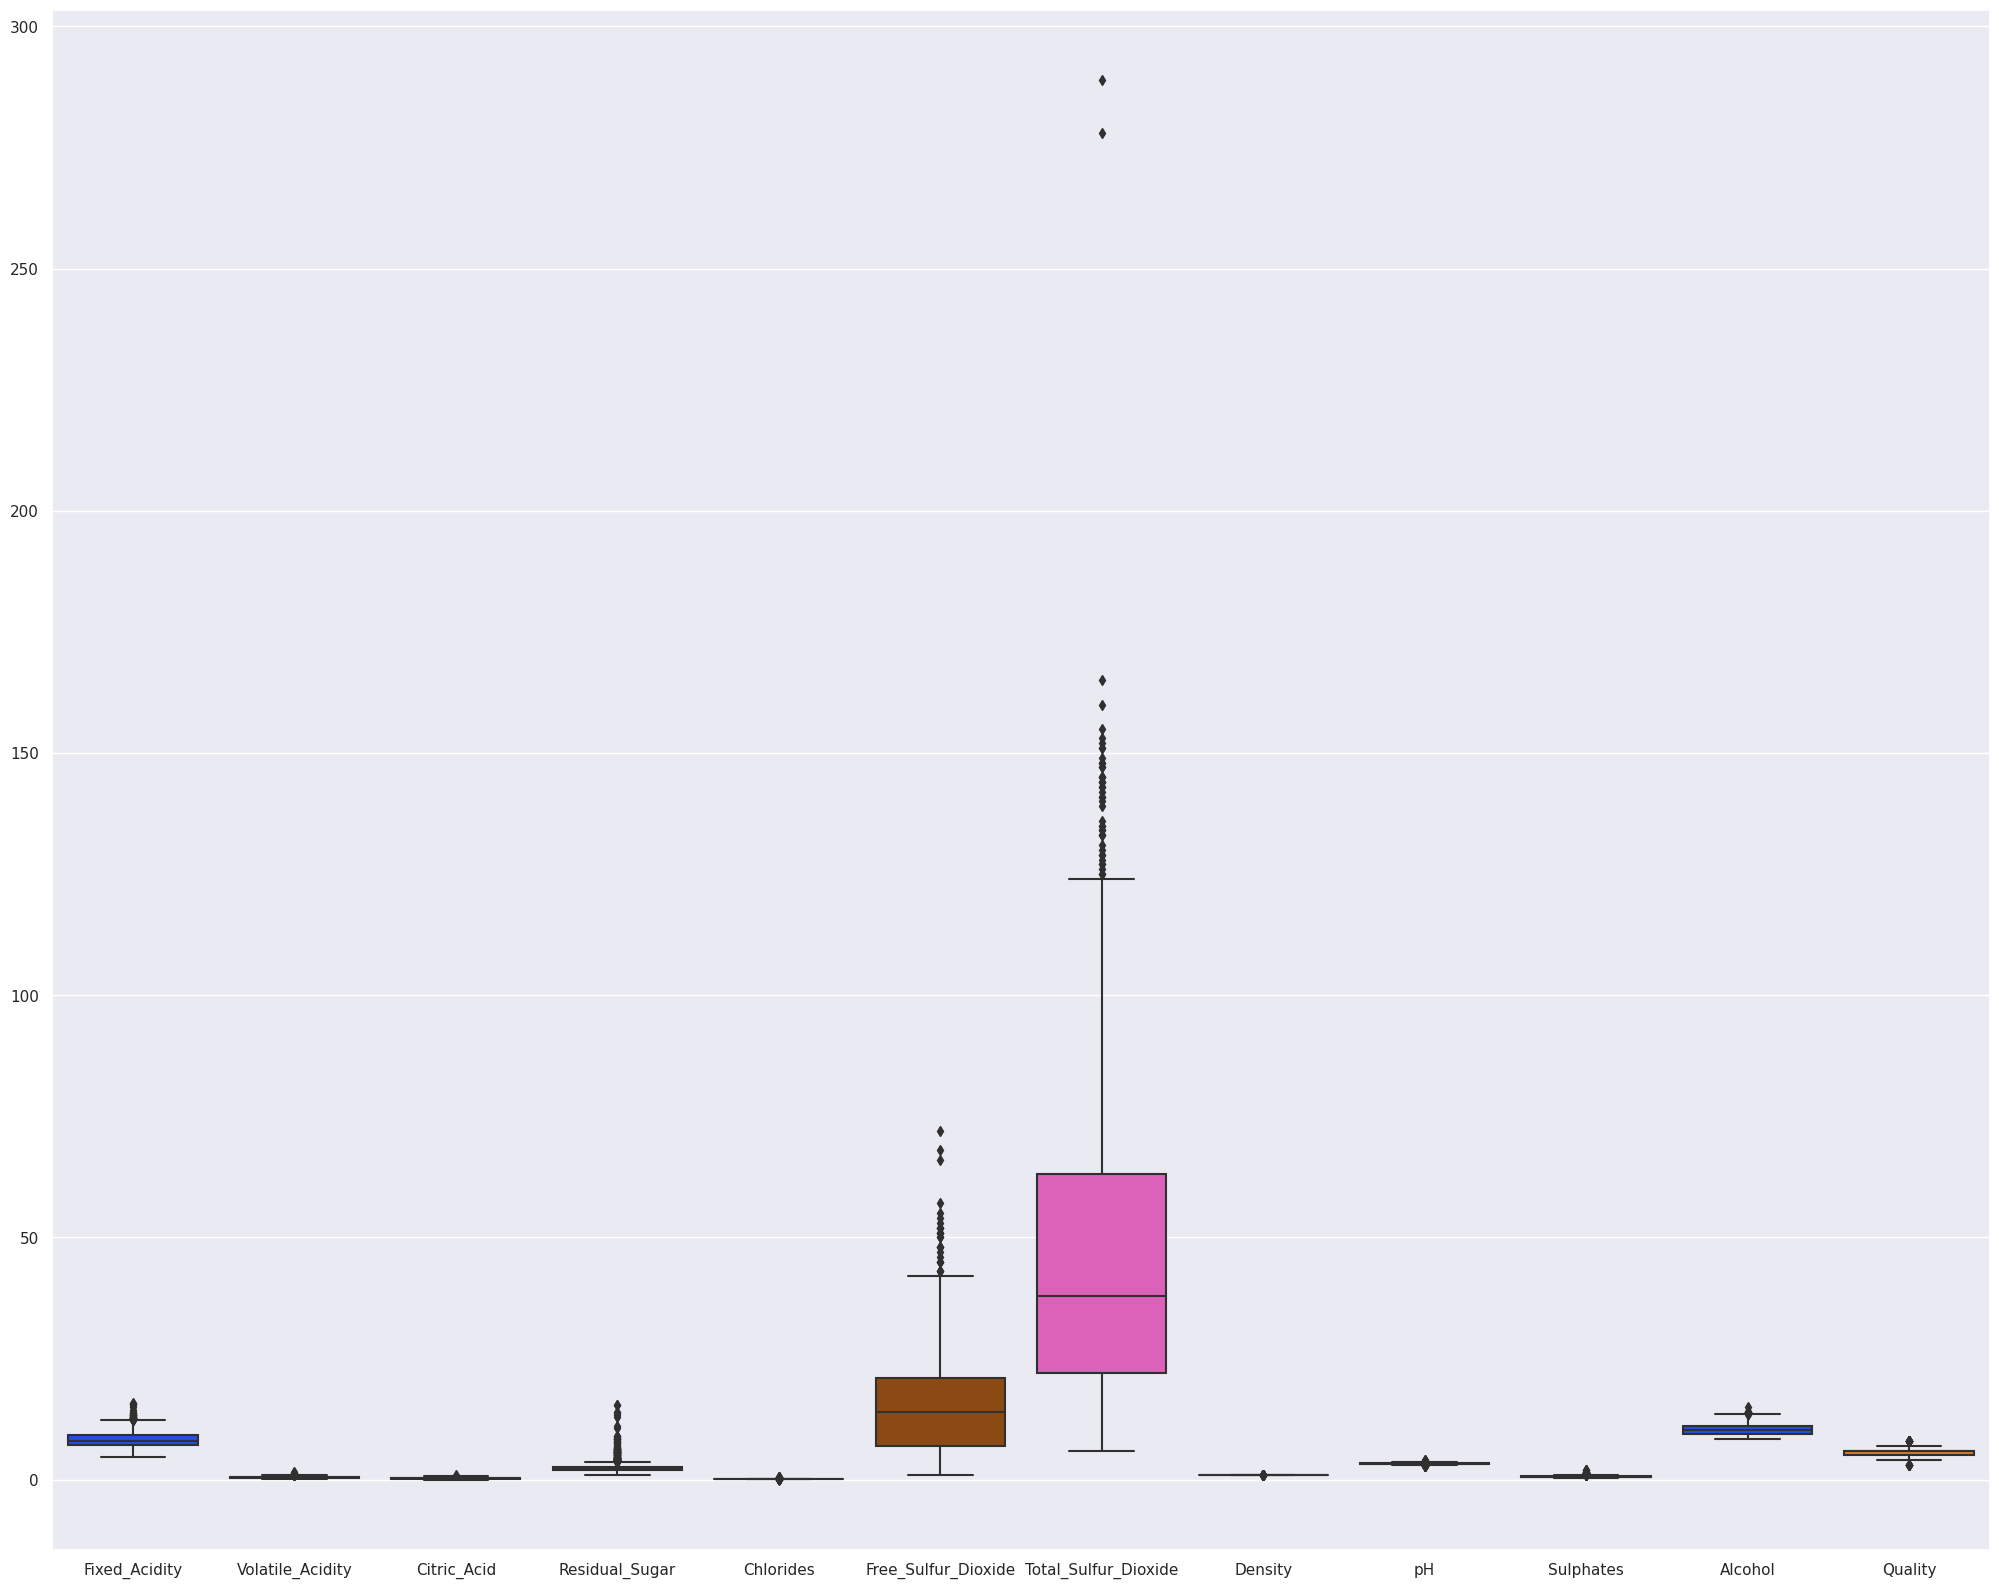

In [447]:
#Mencari outliers pada data
sns.set()
plt.figure(figsize=(25,20))
sns.boxplot(data=df,palette="bright")
plt.show()

Terdapat outlier pada data Free_Sulfur_Dioxide dan Total_Sulfur_Dioxide. Outliers dapat mempengaruhi model sehingga harus ditangani.

In [448]:
#Melihat kadar berapa persen yang paling banyak pada data
df['Alcohol'].value_counts().sort_values()

10.750000      1
8.800000       1
9.050000       1
9.250000       1
9.233333       1
            ... 
10.000000     61
9.800000      63
9.200000      65
9.400000      91
9.500000     111
Name: Alcohol, Length: 65, dtype: int64

Kadar alkohol 9.5% yang paling banyak ditemukan dalam data.

In [449]:
#Melihat ada berapa tipe kualitas wine
df['Quality'].value_counts().sort_values()

3     10
8     17
4     53
7    167
6    535
5    577
Name: Quality, dtype: int64

Data target (Quality) mempunyai 6 kelas dari angka 3 sampai 8.

##Feature Engineering

In [450]:
#Memisahkan data untuk Model Inference
df_inf = df.sample(10, random_state = 77)
df_inf

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
1275,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.500000,6
110,7.8,0.560,0.19,1.8,0.104,12.0,47.0,0.99640,3.19,0.93,9.500000,5
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.000000,3
92,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.800000,5
1514,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,6
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.000000,4
611,13.2,0.380,0.55,2.7,0.081,5.0,16.0,1.00060,2.98,0.54,9.400000,5
996,5.6,0.660,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.800000,7
789,8.6,0.630,0.17,2.9,0.099,21.0,119.0,0.99800,3.09,0.52,9.300000,5
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.300000,6


In [451]:
#Memisahkan Data Inference dari dataset
df_train_test = df.drop(df_inf.index)
df_train_test

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [452]:
#Menentukan fitur dan target menggunakan train_test_split
X = df_train_test.drop(['Quality'], axis=1)
y = df_train_test['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77, stratify=y)

In [453]:
#Melihat hasil inference dan data split
print('Train Set shape : ', X_train.shape)
print('Test Set shape : ', X_test.shape)
print('Inference Set shape : ', df_inf.shape)

Train Set shape :  (1079, 11)
Test Set shape :  (270, 11)
Inference Set shape :  (10, 12)


In [454]:
#Menangani outliers
lower_limit = df["Free_Sulfur_Dioxide"].mean() - 3*df["Free_Sulfur_Dioxide"].std()
upper_limit = df["Free_Sulfur_Dioxide"].mean() + 3*df["Free_Sulfur_Dioxide"].std()
df = df[(df["Free_Sulfur_Dioxide"] > lower_limit) & (df["Free_Sulfur_Dioxide"] < upper_limit)]
print('Free_Sulfur_Dioxide mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=lower_limit, upperboundary=upper_limit))

lower_limit = df['Total_Sulfur_Dioxide'].mean() - 3*df['Total_Sulfur_Dioxide'].std()
upper_limit = df['Total_Sulfur_Dioxide'].mean() + 3*df['Total_Sulfur_Dioxide'].std()
df = df[(df['Total_Sulfur_Dioxide'] > lower_limit) & (df['Total_Sulfur_Dioxide'] < upper_limit)]
print('Total_Sulfur_Dioxide mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=lower_limit, upperboundary=upper_limit))

Free_Sulfur_Dioxide mempunyai outliers < -15.448506877219662 dan > 47.235114677072495
Total_Sulfur_Dioxide mempunyai outliers < -52.48509540972066 dan > 144.70731763194289


In [455]:
#Menangani outliers
def max_value(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

for df in [X_train, X_test]:
    df['Free_Sulfur_Dioxide'] = max_value(df, 'Free_Sulfur_Dioxide', 47.2)
    df['Total_Sulfur_Dioxide'] = max_value(df, 'Total_Sulfur_Dioxide', 144.7)

In [456]:
print('Free_Sulfur_Dioxide setelah di capping :' , (X_train.Free_Sulfur_Dioxide.max(), X_test.Free_Sulfur_Dioxide.max()))
print('Total_Sulfur_Dioxide setelah di capping :' , (X_train.Total_Sulfur_Dioxide.max(), X_test.Total_Sulfur_Dioxide.max()))

Free_Sulfur_Dioxide setelah di capping : (47.2, 47.2)
Total_Sulfur_Dioxide setelah di capping : (144.7, 144.7)


In [457]:
#Memeriksa variable numerical
numericals = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numericals

['Fixed_Acidity',
 'Volatile_Acidity',
 'Citric_Acid',
 'Residual_Sugar',
 'Chlorides',
 'Free_Sulfur_Dioxide',
 'Total_Sulfur_Dioxide',
 'Density',
 'pH',
 'Sulphates',
 'Alcohol']

In [458]:
#Membuat data numericals untuk discaling
df_num = df[['Fixed_Acidity',
 'Volatile_Acidity',
 'Citric_Acid',
 'Residual_Sugar',
 'Chlorides',
 'Free_Sulfur_Dioxide',
 'Total_Sulfur_Dioxide',
 'Density',
 'pH',
 'Sulphates',
 'Alcohol']]
df_num

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol
1534,6.6,0.56,0.14,2.4,0.064,13.0,29.0,0.99397,3.42,0.62,11.70
582,11.7,0.49,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.20
1145,8.2,0.20,0.43,2.5,0.076,31.0,51.0,0.99672,3.53,0.81,10.40
1521,6.9,0.48,0.20,1.9,0.082,9.0,23.0,0.99585,3.39,0.43,9.05
50,8.8,0.66,0.26,1.7,0.074,4.0,23.0,0.99710,3.15,0.74,9.20
...,...,...,...,...,...,...,...,...,...,...,...
146,5.8,0.68,0.02,1.8,0.087,21.0,94.0,0.99440,3.54,0.52,10.00
718,8.4,0.56,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.60
1550,7.1,0.68,0.00,2.3,0.087,17.0,26.0,0.99783,3.45,0.53,9.50
766,8.8,0.59,0.18,2.9,0.089,12.0,74.0,0.99738,3.14,0.54,9.40


In [459]:
df_num.describe().round(2)

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol
count,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00
mean,8.38,0.54,0.28,2.40,0.09,15.22,45.27,1.00,3.31,0.65,10.47
std,1.76,0.19,0.20,1.06,0.05,9.70,31.41,0.00,0.15,0.15,1.08
min,5.00,0.16,0.00,1.20,0.03,1.00,7.00,0.99,2.92,0.37,9.00
25%,7.10,0.38,0.10,1.90,0.07,7.00,22.00,1.00,3.20,0.55,9.50
50%,8.00,0.52,0.29,2.15,0.08,13.00,37.00,1.00,3.30,0.62,10.20
75%,9.28,0.66,0.44,2.58,0.09,21.00,62.00,1.00,3.40,0.72,11.20
max,14.00,1.33,0.79,10.70,0.46,47.20,144.70,1.00,3.90,1.28,13.40


Karena semua data berupa data numerical, maka semua fitur akan berupa numerical

In [460]:
#Encoding
enc= OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(X_train)

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [461]:
X_enc_train=enc.transform(X_train)
X_enc_test=enc.transform(X_test)
X_enc_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [462]:
#Scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_num_scaled = scaler.transform(X_train)
X_test_num_scaled = scaler.transform(X_test)
X_train_num_scaled

array([[0.61061947, 0.32191781, 0.59      , ..., 0.34645669, 0.19161677,
        0.4       ],
       [0.54867257, 0.09589041, 0.45      , ..., 0.30708661, 0.1257485 ,
        0.18461538],
       [0.28318584, 0.29452055, 0.        , ..., 0.40944882, 0.18562874,
        0.15384615],
       ...,
       [0.21238938, 0.32876712, 0.12      , ..., 0.61417323, 0.17365269,
        0.27692308],
       [0.44247788, 0.17808219, 0.31      , ..., 0.35433071, 0.22155689,
        0.24615385],
       [0.23893805, 0.14383562, 0.47      , ..., 0.46456693, 0.11976048,
        0.29230769]])

In [463]:
#Membuat Pipeline
pipe_FE = ColumnTransformer([
    ('OHE', OneHotEncoder(handle_unknown='ignore'), df_num),
    ('MMScaler', MinMaxScaler(), df_num)
])

##Model Definition

In [464]:
#Model Logistic Regression
log_model = LogisticRegression(random_state=77)
log_model.fit(X_enc_train,y_train)

LogisticRegression(random_state=77)

In [465]:
# Model Pipeline
pipe_lr = Pipeline([
    ('preprocessing', pipe_FE),
    ('log_model', log_model)
])

# Hyper parameter
params_lr = {
    'lr__fit_intercept': [True, False],
}

In [466]:
#Model Decission Tree
DTmodel = DecisionTreeClassifier(random_state=77)
DTmodel.fit(X_enc_train,y_train)

DecisionTreeClassifier(random_state=77)

In [467]:
# Model Pipeline
pipe_dt = Pipeline([
    ('preprocessing', pipe_FE),
    ('DTmodel', DTmodel)
])

# Hyper parameter
params_dt = {
    'DTmodel_criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'DTmodel__spliter': ['best', 'random'],
    'DTmodel__max_features': ['auto', 'sqrt', 'log2']
}

In [468]:
#Model Random Forest
RFmodel = RandomForestClassifier(random_state=77)
RFmodel.fit(X_enc_train,y_train)

RandomForestClassifier(random_state=77)

In [469]:
# Model Pipeline
pipe_rf = Pipeline([
    ('preprocessing', pipe_FE),
    ('RFmodel', RFmodel)
])

# Hyper parameter
params_rf = {
    'RFmodel__criterion': ['squared_error', 'absolute_error', 'poisson'],
    'RFmodel__max_features': ['auto', 'sqrt', 'log2'],
    'RFmodel__warm_start': [True, False]
}

In [470]:
#Model SVM Regression
SVMmodel = SVC(gamma="scale", random_state=77)
SVMmodel.fit(X_enc_train,y_train)

SVC(random_state=77)

In [471]:
# Model Pipeline
pipe_svr = Pipeline([
    ('preprocessing', pipe_FE),
    ('SVMmodel', SVMmodel)
])

# Hyper parameter
params_svr = {
    'SVMmodel__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'SVMmodel__degree': [2, 3, 4],
    'SVMmodel__C': [0.1, 1, 10]
}

##Model Training

In [472]:
#Logistic Regression
y_pred_train_LR = log_model.predict(X_enc_train)
y_pred_test_LR = log_model.predict(X_enc_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_LR))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_LR))

accuracy score train :  0.9805375347544022
accuracy score test :  0.48518518518518516


In [473]:
#Decission Tree
y_pred_train_DT = DTmodel.predict(X_enc_train)
y_pred_test_DT = DTmodel.predict(X_enc_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_DT))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_DT))

accuracy score train :  1.0
accuracy score test :  0.4074074074074074


In [474]:
#Random Forest
y_pred_train_RF = RFmodel.predict(X_enc_train)
y_pred_test_RF = RFmodel.predict(X_enc_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_RF))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_RF))

accuracy score train :  1.0
accuracy score test :  0.5222222222222223


In [475]:
#SVM
y_pred_train_SVM = SVMmodel.predict(X_enc_train)
y_pred_test_SVM = SVMmodel.predict(X_enc_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_SVM))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_SVM))

accuracy score train :  0.9101019462465245
accuracy score test :  0.5074074074074074


###Memeriksa cross validation

In [476]:
#Logistic Regression
cvsLR= cross_val_score(log_model, X_train, y_train, cv = 3, scoring='accuracy')
print('Cross-validation Logistic Regression:{}'.format(cvsLR))

Cross-validation Logistic Regression:[0.56388889 0.57222222 0.58495822]


In [477]:
print('Rata-rata cross-validation Logistic Regression: {:.4f}'.format(cvsLR.mean()))
print('Standard Deviation Logistic Regression: {:.4f}'.format(cvsLR.std()))

Rata-rata cross-validation Logistic Regression: 0.5737
Standard Deviation Logistic Regression: 0.0087


In [478]:
#Decision Tree
cvsDT= cross_val_score(DTmodel, X_train, y_train, cv = 3, scoring='accuracy')
print('Cross-validation Decision Tree:{}'.format(cvsDT))

Cross-validation Decision Tree:[0.47777778 0.475      0.47075209]


In [479]:
print('Rata-rata cross-validation Decision Tree: {:.4f}'.format(cvsDT.mean()))
print('Standard Deviation Decision Tree: {:.4f}'.format(cvsDT.std()))

Rata-rata cross-validation Decision Tree: 0.4745
Standard Deviation Decision Tree: 0.0029


In [480]:
#Random Forest
cvsRF= cross_val_score(RFmodel, X_train, y_train, cv = 3, scoring='accuracy')
print('Cross-validation Random Forest:{}'.format(cvsRF))

Cross-validation Random Forest:[0.60277778 0.56944444 0.56824513]


In [481]:
print('Rata-rata cross-validation Random Forest: {:.4f}'.format(cvsRF.mean()))
print('Standard Deviation Random Forest: {:.4f}'.format(cvsRF.std()))

Rata-rata cross-validation Random Forest: 0.5802
Standard Deviation Random Forest: 0.0160


In [482]:
#SVM
cvsSVM= cross_val_score(SVMmodel, X_train, y_train, cv = 3, scoring='accuracy')
print('Cross-validation SVM:{}'.format(cvsSVM))

Cross-validation SVM:[0.47222222 0.46388889 0.53203343]


In [483]:
print('Rata-rata cross-validation SVM: {:.4f}'.format(cvsSVM.mean()))
print('Standard Deviation SVM: {:.4f}'.format(cvsSVM.std()))

Rata-rata cross-validation SVM: 0.4894
Standard Deviation SVM: 0.0304


Dari hasil Cross-Validation diatas, terlihat bahwa model terbaik adalah Random Forest dengan rata-rata cross-validation tertinggi yaitu 0.5802. Model Logistic Regression mempunyai nilai rata-rata cross-validation tertinggi kedua yaitu 0.5737.

Kedua model ini akan dipilih untuk dilakukan hyper parameter tuning untuk mencari model terbaik dari antara keduanya.

###Hyperparameter tuning

In [484]:
#Random Forest

max_features = ['auto', 'sqrt', 'log2']


parametersRF= {'max_features':max_features,
               'criterion':['entropy','gini']}

grid_RF = GridSearchCV(estimator = RFmodel,
                           param_grid = parametersRF,
                           scoring = 'accuracy',
                           cv = 3,
                           verbose=0)
grid_RF.fit(X_train, y_train)

best_params_RF = grid_RF.best_params_
best_pipe_RF = grid_RF.best_estimator_
df_result_RF = pd.DataFrame.from_dict(grid_RF.cv_results_, orient='columns')

In [485]:
#Nilai terbaik dari GridSearchCV
print('Nilai terbaik GridSearch CV Random Forest: {:.4f}\n\n'.format(grid_RF.best_score_))

#Mencari parameter terbaik
print('Parameter terbaik :','\n\n', (grid_RF.best_params_))

#Estimator terbaik dari GridSearch
print('\n\nEstimator terbaik :','\n\n', (grid_RF.best_estimator_))

Nilai terbaik GridSearch CV Random Forest: 0.5839


Parameter terbaik : 

 {'criterion': 'entropy', 'max_features': 'auto'}


Estimator terbaik : 

 RandomForestClassifier(criterion='entropy', max_features='auto',
                       random_state=77)


Hyper parameter yang terbaik dari model Random Forest adalah

* criterion : entropy
* max_features : auto

In [486]:
#Pada Logistic Regression
parametersLR = {
    'C': [0.001, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_LR = GridSearchCV(estimator = log_model,
                           param_grid = parametersLR,
                           scoring = 'accuracy',
                           cv = 3,
                           verbose=0)
grid_LR.fit(X_train, y_train)

best_params_LR = grid_LR.best_params_
best_pipe_LR = grid_LR.best_estimator_
df_result_LR = pd.DataFrame.from_dict(grid_LR.cv_results_, orient='columns')

In [487]:
#Nilai terbaik dari GridSearchCV
print('Nilai terbaik GridSearch CV Logistic Regression: {:.4f}\n\n'.format(grid_LR.best_score_))

#Mencari parameter terbaik
print('Parameter terbaik :','\n\n', (grid_LR.best_params_))

#Estimator terbaik dari GridSearch
print('\n\nEstimator terbaik :','\n\n', (grid_LR.best_estimator_))

Nilai terbaik GridSearch CV Logistic Regression: 0.5950


Parameter terbaik : 

 {'C': 1, 'solver': 'newton-cg'}


Estimator terbaik : 

 LogisticRegression(C=1, random_state=77, solver='newton-cg')


##Model Evaluation

In [488]:
#Prediksi Train_Set
y_train_pred_1 = best_pipe_RF.predict(X_train).round(2)
y_train_pred_2 = best_pipe_LR.predict(X_train).round(2)
print('MAE Train Random Forest:',round(mean_absolute_error(y_train,y_train_pred_1),2))
print('MAE Train Logistic Regression:',round(mean_absolute_error(y_train,y_train_pred_2),2))
print('R-squared Score Train RF:',round(r2_score(y_train,y_train_pred_1),2))
print('R-squared Score Train Logistic Regression:',round(r2_score(y_train,y_train_pred_2),2))

MAE Train Random Forest: 0.0
MAE Train Logistic Regression: 0.44
R-squared Score Train RF: 1.0
R-squared Score Train Logistic Regression: 0.21


In [489]:
#Prediksi Test_Set
y_test_pred_1 = best_pipe_RF.predict(X_test).round(2)
y_test_pred_2 = best_pipe_LR.predict(X_test).round(2)
print('MAE Test Random Forest:',round(mean_absolute_error(y_test,y_test_pred_1),2))
print('MAE Test Logistic Regression:',round(mean_absolute_error(y_test,y_test_pred_2),2))
print('R-squared Score Test Random Forest:',round(r2_score(y_test,y_test_pred_1),2))
print('R-squared Score Test Logistic Regression:',round(r2_score(y_test,y_test_pred_2),2))

MAE Test Random Forest: 0.42
MAE Test Logistic Regression: 0.46
R-squared Score Test Random Forest: 0.25
R-squared Score Test Logistic Regression: 0.23


Kedua model yang dipilih menunjukan performa yang dibawah ekspektasi.

Model Random Forest memberikan nilai MAE yang lebih rendah pada fase train daripada fase test, namun memberikan nilai R-squared score yang lebih tinggi pada fase train dibandingkan fase test. Hal ini menunjukan bahwa model Random Forest sedikit overfiiting terhadap dataset.

Model Logistic Regression memberikan nilai MAE dan R-squared yang lebih rendah pada fase train dibandingkan fase test, namun perbedaannya sangat kecil. Bisa diartikan bahwa model Logistic Regression mempunyai sifat goodfit terhadap dataset.

Karena model Logistic Regression bersifat goodfit terhadap dataset, maka model Logistic Regression akan dipilih menjadi model akhir.

##Model Saving

In [490]:
#Save model
with open('model.pkl', 'wb') as file_1:
    pickle.dump(best_pipe_LR, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
     pickle.dump(scaler, file_2)

with open('model_enc.pkl', 'wb') as file_3:
     pickle.dump(enc, file_3)

##Model Inference

In [491]:
#Load model untuk digunakan ke data inference
with open('model.pkl','rb') as file_1:
    best_pipe_LR = pickle.load(file_1)

with open('model_scaler.pkl','rb') as file_2:
    scaler = pickle.load(file_2)

with open('model_enc.pkl','rb') as file_3:
    enc = pickle.load(file_3)

In [492]:
#Melihat data inference
df_inf

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
1275,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.500000,6
110,7.8,0.560,0.19,1.8,0.104,12.0,47.0,0.99640,3.19,0.93,9.500000,5
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.000000,3
92,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.800000,5
1514,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,6
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.000000,4
611,13.2,0.380,0.55,2.7,0.081,5.0,16.0,1.00060,2.98,0.54,9.400000,5
996,5.6,0.660,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.800000,7
789,8.6,0.630,0.17,2.9,0.099,21.0,119.0,0.99800,3.09,0.52,9.300000,5
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.300000,6


In [493]:
#Memeriksa missing value data inference
df_inf.isnull().sum()

Fixed_Acidity           0
Volatile_Acidity        0
Citric_Acid             0
Residual_Sugar          0
Chlorides               0
Free_Sulfur_Dioxide     0
Total_Sulfur_Dioxide    0
Density                 0
pH                      0
Sulphates               0
Alcohol                 0
Quality                 0
dtype: int64

In [494]:
#Split dataset
X_inf = df_inf.drop(['Quality'], axis=1)
y_inf = df_inf['Quality']

In [495]:
#Hasil prediction
y_inf_pred = best_pipe_LR.predict(X_inf).round(2)
y_inf_pred

array([5, 5, 5, 6, 5, 5, 5, 6, 5, 5])

In [496]:
print('Accuracy Score inference : ',accuracy_score(y_inf,y_inf_pred))
print('MAE inference:',round(mean_absolute_error(y_inf,y_inf_pred),2))
print('R-squared Score inference:',round(r2_score(y_inf,y_inf_pred),2))

Accuracy Score inference :  0.3
MAE inference: 0.8
R-squared Score inference: 0.14


Accuracy score test model lebih tinggi dibanding model inference, namun nilai MAE dan R-squared model inference lebih tinggi dibanding test model.

##Kesimpulan

Kesimpulan yang bisa saya dapatkan yaitu karena model kurang bisa memberikan performa yang baik berdasarkan data yang ada, sebaiknya ditambahkan data-data yang lain seperti negara asal, tahun pembuatan, waktu fermentasi anggur, dan lain sebagainya. Dengan adanya data tambahan yang lain, model bisa mendapatkan peningkatan performa untuk memberikan prediksi yang lebih akurat.

